In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# !pip install cmath
!pip install torch
!pip install sklearn
!pip install pandas
!pip install librosa
!pip install numpy
!pip install speechpy
!pip install transformers
!pip install jiwer
!pip install pyctcdecode

from pyctcdecode import build_ctcdecoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=2deb1316f6cb9cc641dd23d5ad817483e6931174cec73947ce5eea68c4ac4e02
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab

In [ ]:
!pip install pytube
!pip install pydub
!pip install moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 KB 7.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 60.6 MB/s eta 0:00:00


In [ ]:
cd /content/drive/MyDrive/PL

/content/drive/MyDrive/PL


In [ ]:
# from model import Net
# from cProfile import label
# from infer import phonetic_embedding
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import torch
import torch.nn as nn
import torch.nn.functional as F
from phonetic_encoder import Phonetic_encoder
from acoustic_encoder import Acoustic_encoder
from linguistic_encoder import Linguistic_encoder
from char_embedding import text_to_tensor, clean_corpus
from help import wav_norm, Atention
import numpy as np
# from help import beam_search_decoding
from model import Acoustic_Phonetic_Linguistic
# from dataloader import MDD_Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from jiwer import wer, cer
tokenizer = Wav2Vec2Processor.from_pretrained("pretrained_finetuned")

net = Acoustic_Phonetic_Linguistic()





/usr/local/lib/python3.8/dist-packages/transformers/configuration_utils.py:375: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
cd /content

/content


In [ ]:
!pwd

/content


In [ ]:
import os
import argparse
import librosa
import soundfile as sf
import re
import numpy
from pytube import YouTube, Playlist
import pytube
import torch
import torchaudio
import torchaudio.functional as F
import subprocess


# from moviepy.editor import *
import glob
from pydub import AudioSegment

parser = argparse.ArgumentParser()
#download setting




# video index to continue crawling, index = 0 means the first video
START_INDEX = 0

# importing the module
from pytube import YouTube

from pytube import YouTube
yt = YouTube('https://www.youtube.com/watch?v=6MQDjb861yo&ab_channel=pingone')
yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution')[-1].download()



'/content/Tiếng gọi - Bức Tường.mp4'

In [ ]:
x = glob.glob("*.mp4")
for i in range(len(x)):
  os.rename(x[0], 'test.mp4')

In [ ]:
command = "ffmpeg -i test.mp4 -ab 160k -ac 2 -ar 44100 -vn /content/test.wav"
subprocess.call(command, shell=True)

i = 'test.wav'
y, sr = torchaudio.load(i)       
y_16k = F.resample(y, sr, 16000)
y_16k = y_16k.numpy()
y_mono = librosa.to_mono(y_16k)
sf.write(i, y_mono, 16000)

In [ ]:
from pydub import AudioSegment
t1 = 102 * 1000 #Works in milliseconds
t2 = 128 * 1000
newAudio = AudioSegment.from_wav("test.wav")
newAudio = newAudio[t1:t2]
newAudio.export('test.wav', format="wav")

<_io.BufferedRandom name='test.wav'>

In [ ]:
cd /content/drive/MyDrive/PL

/content/drive/MyDrive/PL


In [ ]:
import torch
from infer import phonetic_embedding

net = torch.load('/content/drive/MyDrive/PL/MDD_Checkpoint/song_checkpoint.pth')
net.eval().to('cuda')
path = '/content/test.wav'
lyrics = 'Em kề vai tôi ngồi bên thềm Bỏ lại đằng sau những khúc quanh co Và cám dỗ để quay về Ở đó có tôi với em Này đây tiếng gọi rất mềm Thổi ngọn lửa bừng trong mắt thêm sâu Hẹn ước ngày tháng rất xa'
phonetic = phonetic_embedding(path).squeeze(0)
linguistic = text_to_tensor(lyrics)
linguistic = torch.tensor(linguistic)
phonetic = phonetic.to('cuda')
linguistic = linguistic.to('cuda')
phonetic = phonetic.unsqueeze(0)
linguistic = linguistic.unsqueeze(0)
outputs = net(phonetic, linguistic)
outputs = outputs.detach().cpu().numpy()

/content/drive/MyDrive/PL/linguistic_encoder.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float)


In [ ]:
np.save("/content/output.npy", outputs)

In [ ]:
def clean_corpus(str1):
    res1 = ""
    for i in str1:
        if i.isalpha() or i==" ":
            res1 = res1 + i
    return res1.lower().strip().replace("  ", " ")
print(lyrics)
print(len(clean_corpus(lyrics)))

Em kề vai tôi ngồi bên thềm Bỏ lại đằng sau những khúc quanh co Và cám dỗ để quay về Ở đó có tôi với em Này đây tiếng gọi rất mềm Thổi ngọn lửa bừng trong mắt thêm sâu Hẹn ước ngày tháng rất xa
193


<ipython-input-16-b51369a4e672>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted_ids = torch.argmax(torch.tensor(x), dim=1)


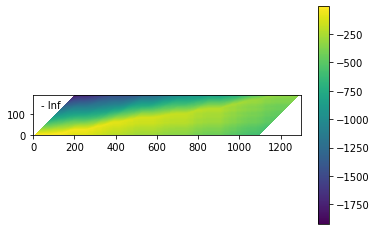

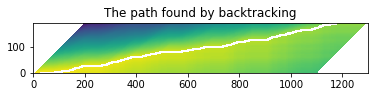

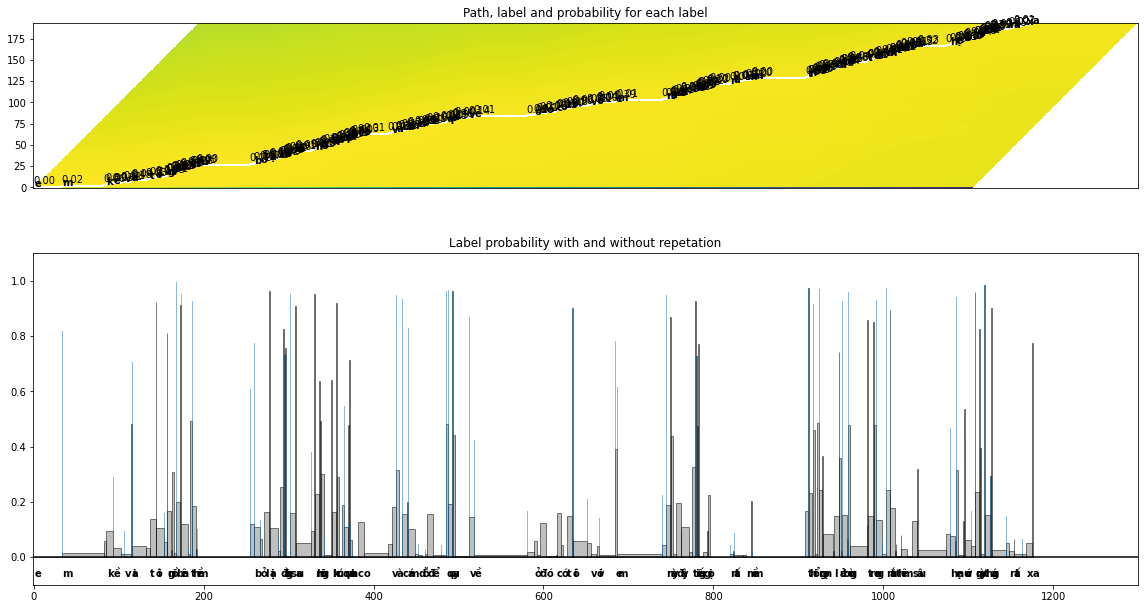

In [ ]:
# /content/drive/MyDrive/output_alignment_fusion/3130303538355f3338.npy
# !pip install torch
# from torch.utils.data import Dataset
# import matplotlib.pyplot as plt
# import os
# import pandas as pd
import torch.nn.functional as F
import torch
import numpy as np
# import numpy as np
# from char_embedding import tensor_to_text
import matplotlib.pyplot as plt
import glob


x = np.load("/content/output.npy")

# print(x)

x = torch.tensor(x)
predicted_ids = torch.argmax(torch.tensor(x), dim=1)


x = torch.log_softmax(x, dim=-1)
x = x.cpu().detach()


labels = ('ắ', 'ồ', 'z', 'ứ', 'ỡ', 'ì', 'x', 'ặ', 'u', 'ẹ', 'd', 'ỵ', 'r', 'p', 't', 'ỳ', 'ẩ', 'f', 'ó', 'á', 'v', 'ã', 'i', 'ư', 'ở', 'ễ', 'ụ', 'ú', 'ũ', ' ', 'ă', 'é', 'ằ', 'a', 'ấ', 'ờ', 'ữ', 'ớ', 'n', 'ý', 's', 'h', 'ơ', 'ị', 'l', 'c', 'k', 'ỷ', 'ỗ', 'ế', 'ẻ', 'ợ', 'ẫ', 'í', 'ỏ', 'ủ', 'g', 'q', 'j', 'ò', 'ỹ', 'ự', 'ô', 'b', 'y', 'ĩ', 'ỉ', 'ẵ', 'ầ', 'ê', 'ộ', 'ậ', 'm', 'ń', 'o', 'ọ', 'đ', 'ẽ', 'ử', 'à', 'è', 'e', 'ẳ', 'ổ', 'ù', 'w', 'ả', 'ạ', 'â', 'ệ', 'ề', 'õ', 'ố', 'ể', 'ừ',)

# def clean_corpus(str1):
#     res1 = ""
#     for i in str1:
#         if i.isalpha() or i==" ":
#             res1 = res1 + i
#     return res1.lower().strip().replace("  ", " ")
transcript = " " + lyrics + ""
transcript = clean_corpus(transcript)
dictionary = {c: i for i, c in enumerate(labels)}

tokens = [dictionary[c] for c in transcript]


def get_trellis(x, tokens, blank_id=95):
    num_frame = x.size(0)
    num_tokens = len(tokens)

    # Trellis has extra diemsions for both time axis and tokens.
    # The extra dim for tokens represents <SoS> (start-of-sentence)
    # The extra dim for time axis is for simplification of the code.
    trellis = torch.empty((num_frame + 1, num_tokens + 1))
    trellis[0, 0] = 0
    trellis[1:, 0] = torch.cumsum(x[:, 0], 0)
    trellis[0, -num_tokens:] = -float("inf")
    trellis[-num_tokens:, 0] = float("inf")

    for t in range(num_frame):
        trellis[t + 1, 1:] = torch.maximum(
            # Score for staying at the same token
            trellis[t, 1:] + x[t, blank_id],
            # Score for changing to the next token
            trellis[t, :-1] + x[t, tokens],
        )
    return trellis


trellis = get_trellis(x, tokens)
plt.imshow(trellis[1:, 1:].T, origin="lower")
plt.annotate("- Inf", (trellis.size(1) / 5, trellis.size(1) / 1.5))
plt.colorbar()
plt.show()

from dataclasses import dataclass
@dataclass
class Point:
  token_index: int
  time_index: int
  score: float


def backtrack(trellis, emission, tokens, blank_id=95):
  # Note:
  # j and t are indices for trellis, which has extra dimensions 
  # for time and tokens at the beginning.
  # When refering to time frame index `T` in trellis,
  # the corresponding index in emission is `T-1`.
  # Similarly, when refering to token index `J` in trellis,
  # the corresponding index in transcript is `J-1`.
  j = trellis.size(1) - 1
  t_start = torch.argmax(trellis[:, j]).item()

  path = []
  for t in range(t_start, 0, -1):
    # 1. Figure out if the current position was stay or change
    # Note (again):
    # `emission[J-1]` is the emission at time frame `J` of trellis dimension.
    # Score for token staying the same from time frame J-1 to T.
    stayed = trellis[t-1, j] + emission[t-1, blank_id]
    # Score for token changing from C-1 at T-1 to J at T.
    changed = trellis[t-1, j-1] + emission[t-1, tokens[j-1]]

    # 2. Store the path with frame-wise probability.
    prob = emission[t-1, tokens[j-1] if changed > stayed else 0].exp().item()
    # Return token index and time index in non-trellis coordinate.
    path.append(Point(j-1, t-1, prob))

    # 3. Update the token
    if changed > stayed:
      j -= 1
      if j == 0:
        break
  else:
    raise ValueError('Failed to align')
  return path[::-1]

path = backtrack(trellis, x, tokens)
def plot_trellis_with_path(trellis, path):
    # To plot trellis with path, we take advantage of 'nan' value
    trellis_with_path = trellis.clone()
    for _, p in enumerate(path):
        trellis_with_path[p.time_index, p.token_index] = float("nan")
    plt.imshow(trellis_with_path[1:, 1:].T, origin="lower")


plot_trellis_with_path(trellis, path)
plt.title("The path found by backtracking")
plt.show()

@dataclass
class Segment:
    label: str
    start: int
    end: int
    score: float
    

    def __repr__(self):
      return f"{self.start} --> {self.end} {self.label} \n"

    @property
    def length(self):
        return self.end - self.start


def merge_repeats(path):
    i1, i2 = 0, 0
    segments = []
    while i1 < len(path):
        while i2 < len(path) and path[i1].token_index == path[i2].token_index:
            i2 += 1
        score = sum(path[k].score for k in range(i1, i2)) / (i2 - i1)
        segments.append(
            Segment(
                transcript[path[i1].token_index],
                path[i1].time_index,
                path[i2 - 1].time_index + 1,
                score,
            )
        )
        i1 = i2
    return segments


segments = merge_repeats(path)

def plot_trellis_with_segments(trellis, segments, transcript):
    # To plot trellis with path, we take advantage of 'nan' value
    trellis_with_path = trellis.clone()
    for i, seg in enumerate(segments):
        if seg.label != "|":
            trellis_with_path[seg.start + 1 : seg.end + 1, i + 1] = float("nan")

    fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(16, 9.5))
    ax1.set_title("Path, label and probability for each label")
    ax1.imshow(trellis_with_path.T, origin="lower")
    ax1.set_xticks([])

    for i, seg in enumerate(segments):
        if seg.label != "|":
            ax1.annotate(seg.label, (seg.start + 0.7, i + 0.3), weight="bold")
            ax1.annotate(f"{seg.score:.2f}", (seg.start - 0.3, i + 4.3))

    ax2.set_title("Label probability with and without repetation")
    xs, hs, ws = [], [], []
    for seg in segments:
        if seg.label != "|":
            xs.append((seg.end + seg.start) / 2 + 0.4)
            hs.append(seg.score)
            ws.append(seg.end - seg.start)
            ax2.annotate(seg.label, (seg.start + 0.8, -0.07), weight="bold")
    ax2.bar(xs, hs, width=ws, color="gray", alpha=0.5, edgecolor="black")

    xs, hs = [], []
    for p in path:
        label = transcript[p.token_index]
        if label != "|":
            xs.append(p.time_index + 1)
            hs.append(p.score)

    ax2.bar(xs, hs, width=0.5, alpha=0.5)
    ax2.axhline(0, color="black")
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_ylim(-0.1, 1.1)


plot_trellis_with_segments(trellis, segments, transcript)
plt.tight_layout()
plt.show()
# Merge words
def merge_words(segments, separator=" "):
    words = []
    i1, i2 = 0, 0
    while i1 < len(segments):
        if i2 >= len(segments) or segments[i2].label == separator:
            if i1 != i2:
                segs = segments[i1:i2]
                word = "".join([seg.label for seg in segs])
                score = sum(seg.score * seg.length for seg in segs) / sum(seg.length for seg in segs)
                words.append(Segment(word, segments[i1].start*20, segments[i2 - 1].end*20, score))
            i1 = i2 + 1
            i2 = i1
        else:
            i2 += 1
    return words


word_segments = merge_words(segments)


In [ ]:
def format_millis(milliseconds):
  millis = milliseconds
  millisecond = int(millis%1000)
  millisecond = str(millisecond)
  if len(millisecond)==0:
    millisecond = '000'
  elif len(millisecond) == 1:
    millisecond = '00' + millisecond
  elif len(millisecond) == 2:
    millisecond = '0' + millisecond

  seconds=(millis/1000)%60
  seconds = int(seconds)
  seconds = str(seconds)
  if len(seconds) == 1:
    seconds = '0' + seconds
  minutes=(millis/(1000*60))%60
  
  minutes = int(minutes)
  minutes = str(minutes)
  if len(minutes) == 1:
    minutes = '0' + minutes

  hours=(millis/(1000*60*60))%24
  hours = int(hours)
  hours = str(hours)
  if len(hours) == 1:
    hours = '0' + hours

  return (hours + ":" + minutes + ":" +  seconds + "," + millisecond)

In [ ]:
f = open("/content/tienggoi.srt", "a")
for i in range(len(word_segments)):
 
  if (i==0):
    start = str(str(word_segments[i])).split(" ")[0]
    end_before = int(str(str(word_segments[i])).split(" ")[2])
    word = str(str(word_segments[i])).split(" ")[3]
    if int(start)>=200:
      start = int(start)-200
    else:
      start = 0
    start_next = int(str(word_segments[i+1]).split(" ")[0])
    end = (2*end_before + start_next)/3
  elif i==len(word_segments)-1:
    end_before = int(str(word_segments[i-1]).split(" ")[2])
    start_next = int(str(word_segments[i]).split(" ")[0])
    end = int(str(word_segments[i]).split(" ")[2]) + 250
    start = (2*end_before+start_next)/3
    word = str(word_segments[i]).split(" ")[3]
  else:
    end_before = int(str(word_segments[i-1]).split(" ")[2])
    start_next = int(str(word_segments[i+1]).split(" ")[0])
    end = int(str(word_segments[i]).split(" ")[2])
    start = int(str(word_segments[i]).split(" ")[0])
    start = (2*end_before+start)/3
    end = (2*end + start_next)/3
    word = str(word_segments[i]).split(" ")[3]
  
  start = (format_millis(start))
  end = (format_millis(end))
  one_line = str(i+1) + "\n" + start + " --> " + end + "\n" + str(word) + "\n\n"
  print(one_line)
  f.write(one_line)


1
00:00:00,000 --> 00:00:01,660
em


2
00:00:01,660 --> 00:00:02,066
kề


3
00:00:02,066 --> 00:00:02,666
vai


4
00:00:02,666 --> 00:00:03,080
tôi


5
00:00:03,080 --> 00:00:03,313
ngồi


6
00:00:03,313 --> 00:00:03,640
bên


7
00:00:03,640 --> 00:00:05,113
thềm


8
00:00:05,113 --> 00:00:05,380
bỏ


9
00:00:05,380 --> 00:00:05,760
lại


10
00:00:05,760 --> 00:00:05,953
đằng


11
00:00:05,953 --> 00:00:06,546
sau


12
00:00:06,546 --> 00:00:06,880
những


13
00:00:06,880 --> 00:00:07,206
khúc


14
00:00:07,206 --> 00:00:07,526
quanh


15
00:00:07,526 --> 00:00:08,366
co


16
00:00:08,366 --> 00:00:08,606
và


17
00:00:08,606 --> 00:00:08,986
cám


18
00:00:08,986 --> 00:00:09,220
dỗ


19
00:00:09,220 --> 00:00:09,620
để


20
00:00:09,620 --> 00:00:10,013
quay


21
00:00:10,013 --> 00:00:11,660
về


22
00:00:11,660 --> 00:00:11,860
ở


23
00:00:11,860 --> 00:00:12,286
đó


24
00:00:12,286 --> 00:00:12,473
có


25
00:00:12,473 --> 00:00:13,046
tôi


26
00:00:13,046 --> 00:00:13,426
với


In [ ]:
!ffmpeg -i /content/lyric_align.jpg -i "/content/test.wav" -sub_charenc utf-8 -i "/content/tienggoi.srt" "/content/OUTPUT.mp4"

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [ ]:
# !ffmpeg -i /content/test.mp4 -sub_charenc utf-8 -i "/content/rap_thoiquen.srt" "/content/OUTPUT.mp4"

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e